In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("/content/abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

# **UNIVARIATE ANALYSIS**

<function matplotlib.pyplot.show(*args, **kw)>

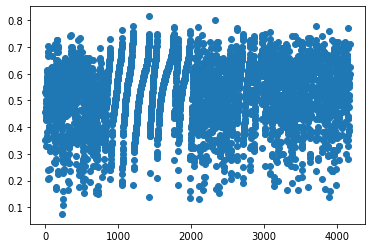

In [4]:
plt.scatter(data.index, data.Length)
plt.show

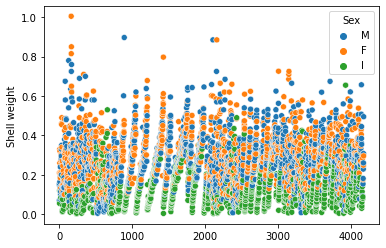

In [5]:
sns.scatterplot(x = data.index, y = data['Shell weight'], hue = data['Sex'])

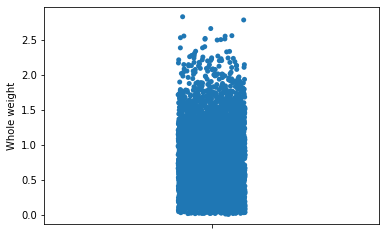

In [6]:
sns.stripplot(y = data['Whole weight'])

# **BIVARIATE ANALYSIS**

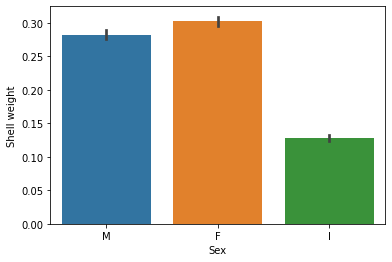

In [7]:
sns.barplot(x = 'Sex', y = 'Shell weight', data = data)

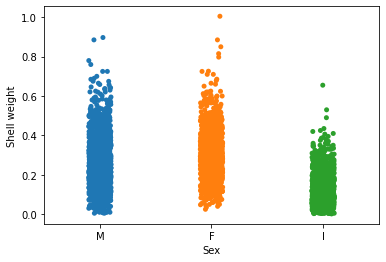

In [48]:
sns.stripplot(x = 'Sex', y = 'Shell weight', data = data)

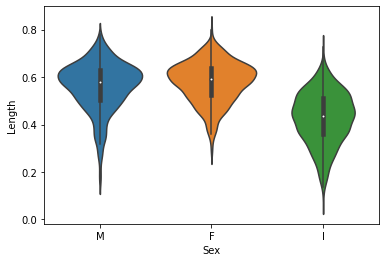

In [50]:
sns.violinplot(x="Sex", y="Length", data=data, size=8) 
plt.show()

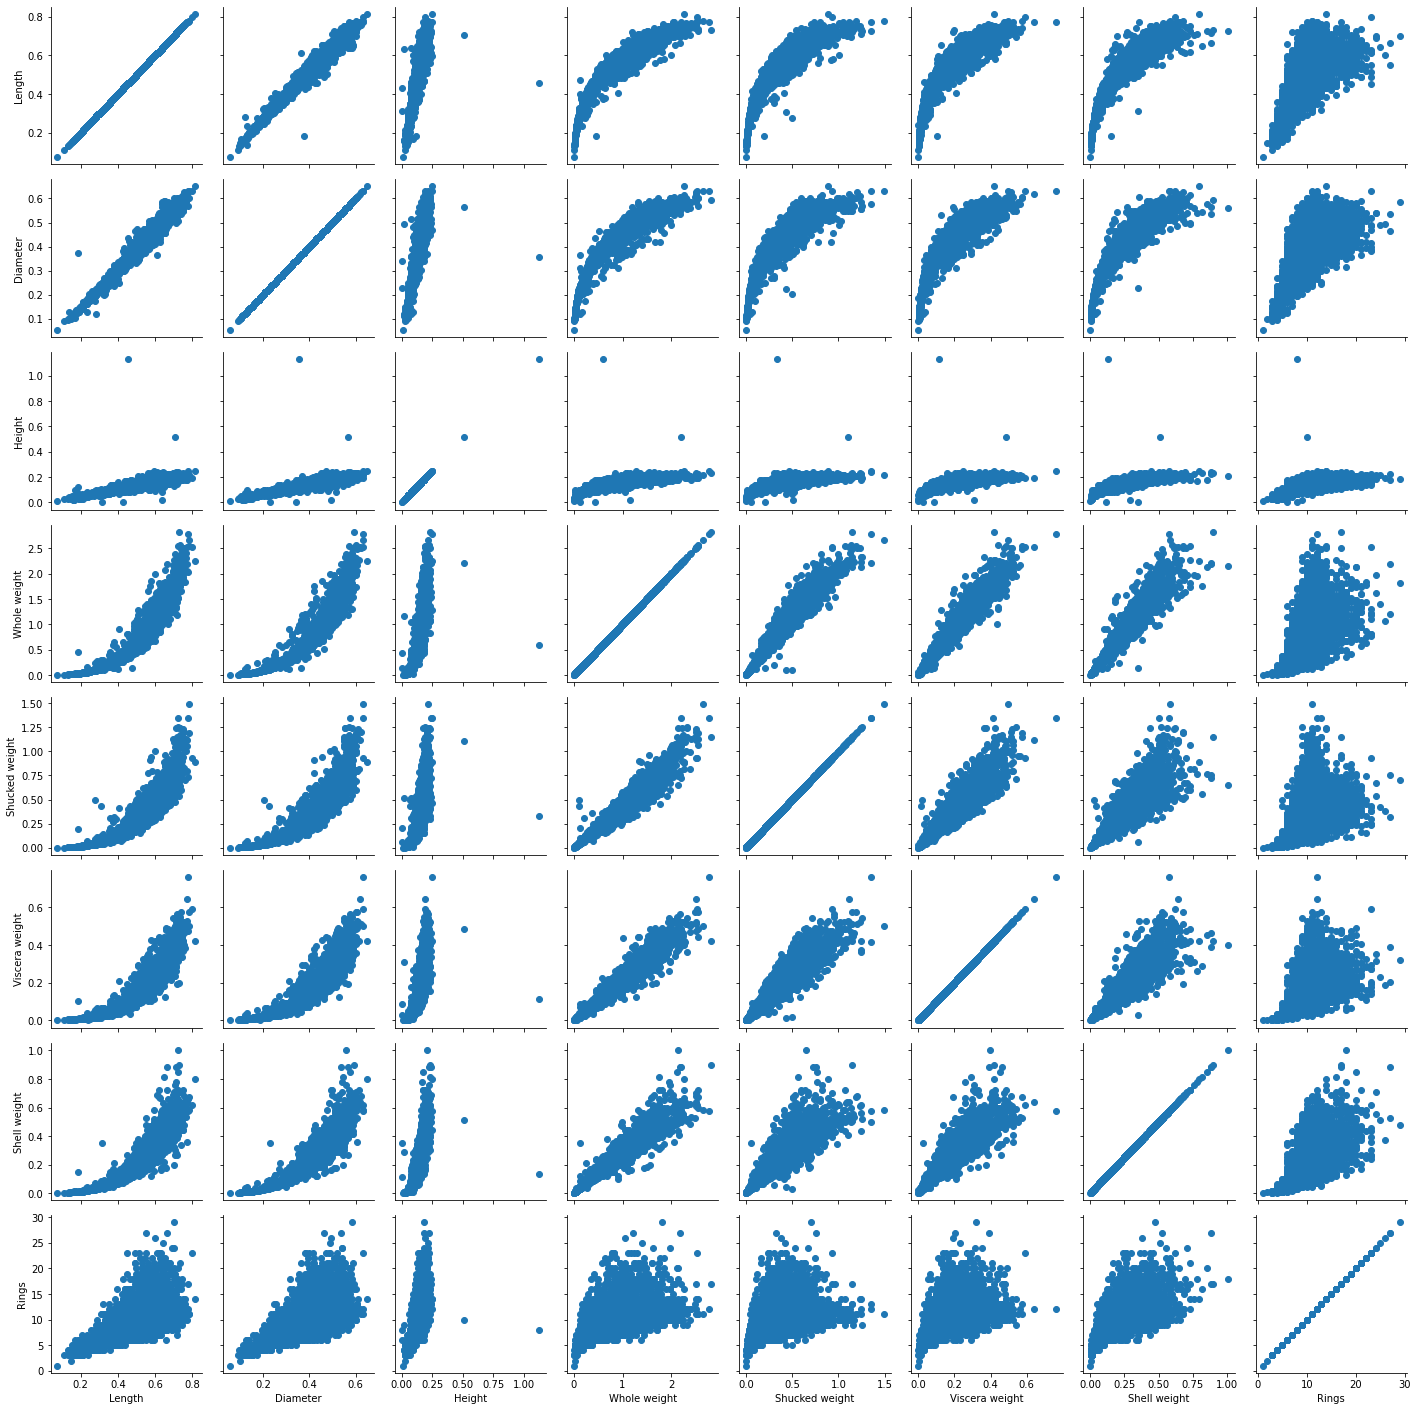

In [9]:
g = sns.PairGrid(data)
g.map(plt.scatter);
plt.show()

# **MULTIVARIATE ANALYSIS** 

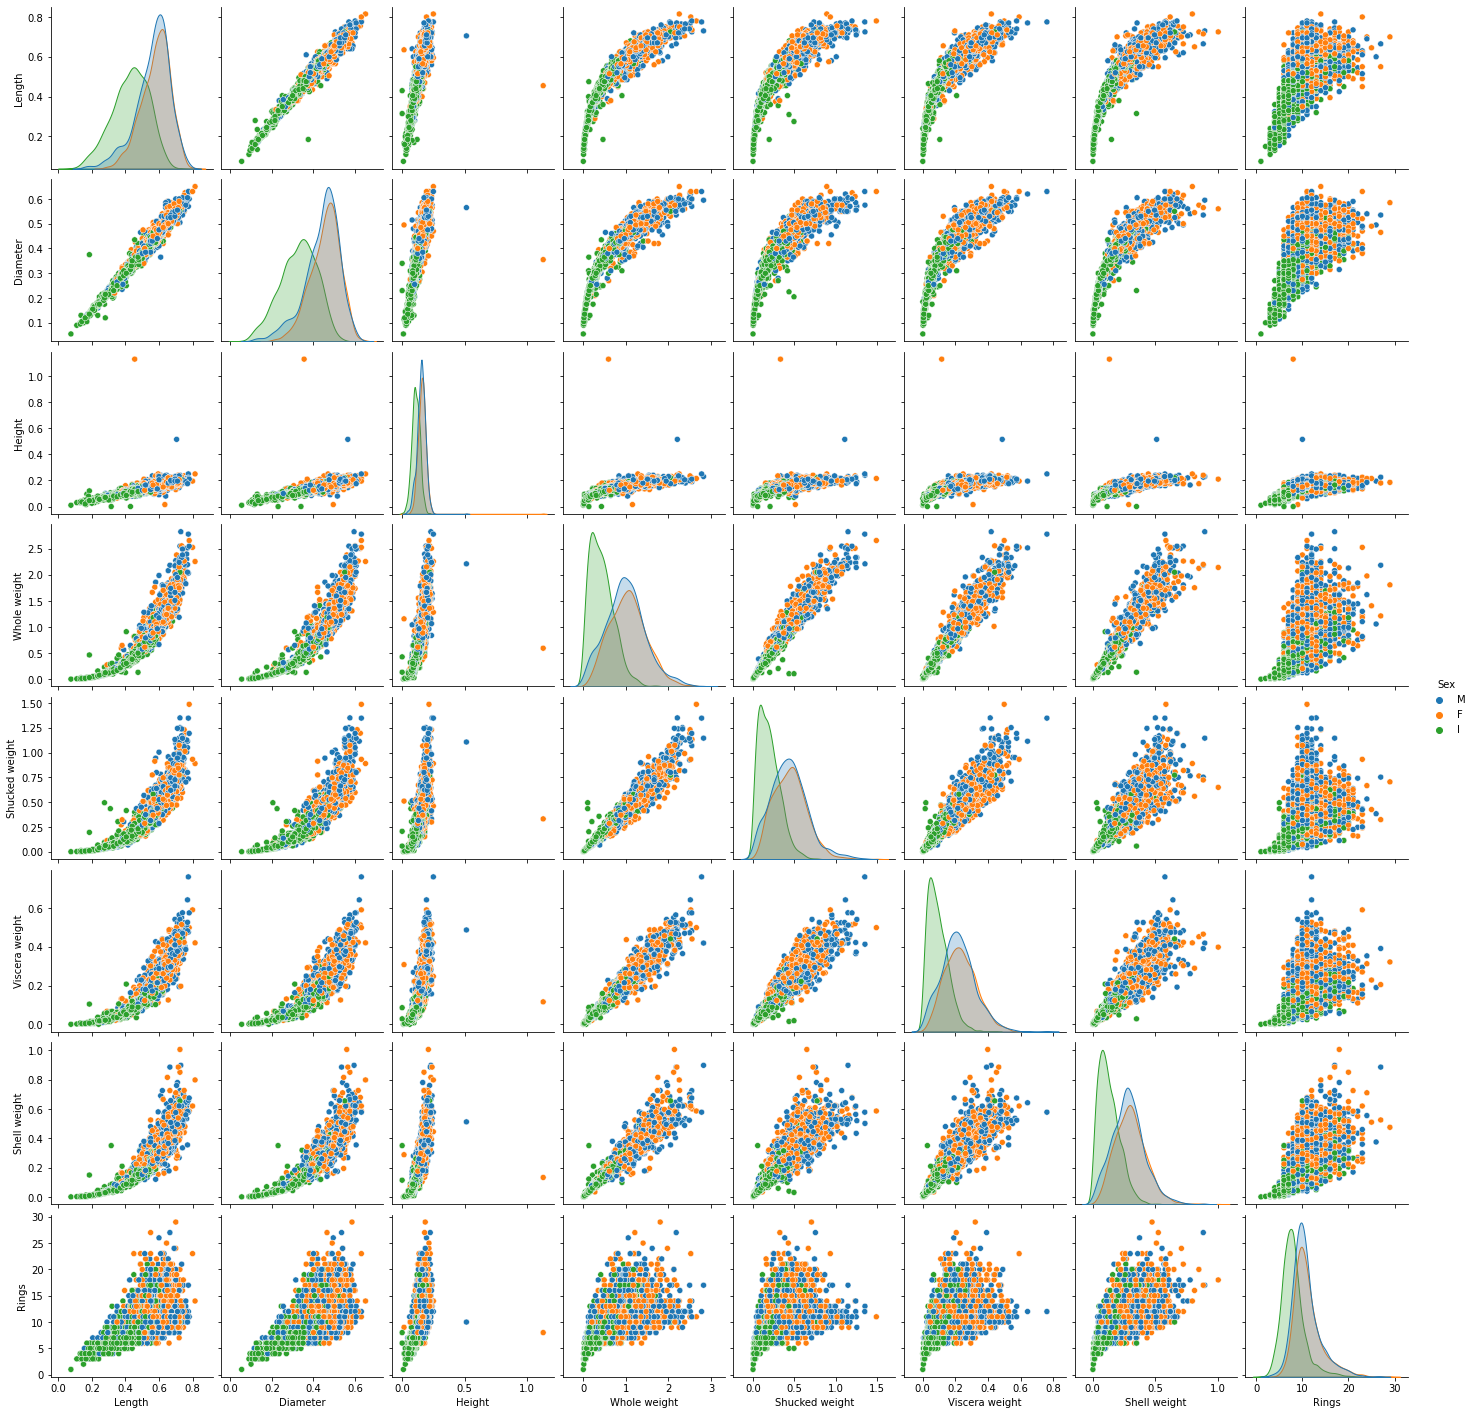

In [10]:
sns.pairplot(data, hue = 'Sex')

# **DESCRIPTIVE STATISTICS**

In [11]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# **CHECKING FOR MISSING VALUES**

In [12]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# **DETECTING AND REMOVING OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


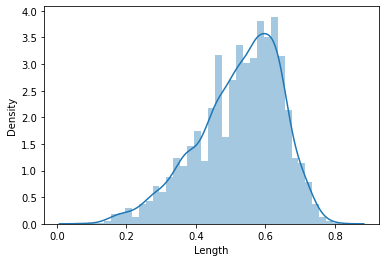

In [13]:
sns.distplot(data['Length'])

In [14]:
print("Highest Allowed", data['Length'].mean() + 3*data['Length'].std())
print("Lowest Allowed", data['Length'].mean() - 3*data['Length'].std())

Highest Allowed 0.8842708372874081
Lowest Allowed 0.16371336189861074


In [15]:
new_data_1 = data[(data['Length'] < 0.88) & (data['Length'] > 0.16)]
new_data_1

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


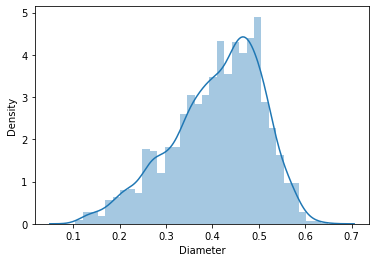

In [16]:
sns.distplot(new_data_1['Diameter'])

In [17]:
print("Highest Allowed", new_data_1['Diameter'].mean() + 3*new_data_1['Diameter'].std())
print("Lowest Allowed", new_data_1['Diameter'].mean() - 3*new_data_1['Diameter'].std())

Highest Allowed 0.7021530659056434
Lowest Allowed 0.11579503596845558


In [18]:
new_data_2 = new_data_1[(new_data_1['Diameter'] < 0.70) & (new_data_1['Diameter'] > 0.11)]
new_data_2

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


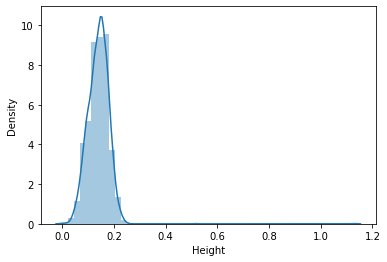

In [19]:
sns.distplot(new_data_2['Height'])

In [20]:
print("Highest Allowed", new_data_2['Height'].mean() + 3*new_data_2['Height'].std())
print("Lowest Allowed", new_data_2['Height'].mean() - 3*new_data_2['Height'].std())

Highest Allowed 0.26392302129656436
Lowest Allowed 0.016002459472666417


In [21]:
new_data_3 = new_data_2[(new_data_2['Height'] < 0.26) & (new_data_2['Height'] > 0.01)]
new_data_3

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


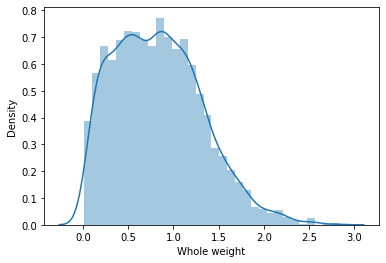

In [22]:
sns.distplot(new_data_3['Whole weight'])

In [23]:
print("Highest Allowed", new_data_3['Whole weight'].mean() + 3*new_data_3['Whole weight'].std())
print("Lowest Allowed", new_data_3['Whole weight'].mean() - 3*new_data_3['Whole weight'].std())

Highest Allowed 2.296724942923132
Lowest Allowed -0.6326260497566255


In [24]:
new_data_4 = new_data_3[(new_data_3['Whole weight'] < 2.29) & (new_data_3['Whole weight'] > -0.63)]
new_data_4

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


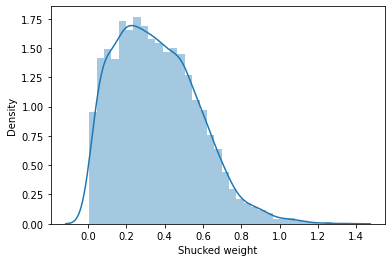

In [25]:
sns.distplot(new_data_4['Shucked weight'])

In [26]:
print("Highest Allowed", new_data_4['Shucked weight'].mean() + 3*new_data_4['Shucked weight'].std())
print("Lowest Allowed", new_data_4['Shucked weight'].mean() - 3*new_data_4['Shucked weight'].std())

Highest Allowed 1.0021188821626532
Lowest Allowed -0.2877115821868253


In [27]:

new_data_5 = new_data_4[(new_data_4['Shucked weight'] < 1) & (new_data_4['Shucked weight'] > -0.28)]
new_data_5

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


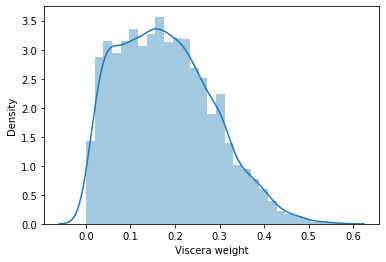

In [28]:
sns.distplot(new_data_5['Viscera weight'])

In [29]:
print("Highest Allowed", new_data_5['Viscera weight'].mean() + 3*new_data_5['Viscera weight'].std())
print("Lowest Allowed", new_data_5['Viscera weight'].mean() - 3*new_data_5['Viscera weight'].std())

Highest Allowed 0.49308793135853607
Lowest Allowed -0.13690476424591141


In [30]:
new_data_6 = new_data_5[(new_data_5['Viscera weight'] < 0.49) & (new_data_5['Viscera weight'] > -0.13)]
new_data_6

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


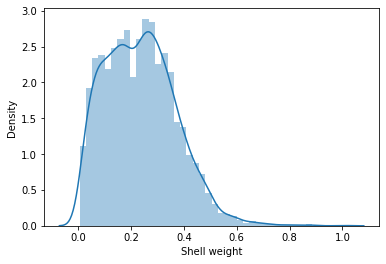

In [31]:
sns.distplot(new_data_6['Shell weight'])

In [32]:
print("Highest Allowed", new_data_6['Shell weight'].mean() + 3*new_data_6['Shell weight'].std())
print("Lowest Allowed", new_data_6['Shell weight'].mean() - 3*new_data_6['Shell weight'].std())

Highest Allowed 0.637963833810313
Lowest Allowed -0.1671638826027014


In [33]:
new_data_7 = new_data_6[(new_data_6['Shell weight'] < 0.63) & (new_data_6['Shell weight'] > -0.16)]
new_data_7

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# **CHECKING CATEGORICAL VARIABLES AND PERFORMING ENCODING**

In [34]:
print(new_data_7['Sex'].unique())

['M' 'F' 'I']


In [35]:
new_data_7['Sex'].value_counts()

M    1476
I    1324
F    1273
Name: Sex, dtype: int64

In [36]:
one_hot_encoded_data = pd.get_dummies(new_data_7, columns = ['Sex'])
print(one_hot_encoded_data)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I

# **SPLITTING THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

In [37]:
y = new_data_7["Rings"] #Dependent Variable
X = new_data_7.drop('Rings',axis=1)

In [38]:
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [39]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4073, dtype: int64

# **SCALE THE INDEPENDENT VARIABLES**

In [40]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()


X = new_data_7[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

scaledX = scale.fit_transform(X)
print(scaledX)

[[-0.57691388 -0.42770779 -1.17548437 ... -0.60854981 -0.73027141
  -0.64045283]
 [-1.48645205 -1.47345252 -1.31107621 ... -1.22027163 -1.24218199
  -1.26347354]
 [ 0.07275625  0.1474518  -0.09074966 ... -0.45194903 -0.33536897
  -0.17318729]
 ...
 [ 0.67911503  0.7226114   1.8075361  ...  0.86447632  1.08822997
   0.59001308]
 [ 0.89567174  0.82718587  0.31602586 ...  0.89139208  0.82983701
   0.49655998]
 [ 1.63196455  1.55920718  1.53635242 ...  2.91986162  1.95604028
   2.046324  ]]


In [41]:
scaledX.shape

(4073, 7)

# **SPLITTING INTO TRAINING AND TESTING**

In [42]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4073, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# **BUILDING THE MODEL**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [52]:
models = {'linear_regression':LinearRegression(),
         
         'lasso':Lasso(random_state=1),
         
         'decision_tree':DecisionTreeRegressor(random_state=1),
         
         'random_forest':RandomForestRegressor(random_state=1),
         
         'xgboost':XGBRegressor(random_state=1),
        }

# **TRAINING AND TESTING THE MODEL**

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_train, y_train)
lin_reg.score(X_test, y_test)

0.46470398143844605

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_train, y_train)
log_reg.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.26134969325153373

In [47]:
from sklearn.svm import SVC
 
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
 
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.24278698588090852
0.24785276073619633


# **COMPARE THE METRICS**

In [56]:
print("Support Vector Machine", svc_model.score(X_test, y_test))
print("Logistic Regression", log_reg.score(X_test, y_test))
print("Linear Regression", lin_reg.score(X_test, y_test))

Support Vector Machine 0.24785276073619633
Logistic Regression 0.26134969325153373
Linear Regression 0.46470398143844605
